In [1]:
from golfDynRespCompare import *

In [2]:
colsOfInterest = ['CO₂ in g/km (Average)(g/km)',
'Distance travelled with MIL/CEL lit(miles)', 'Engine Coolant Temperature(°C)', 'Engine Load(%)',
 'Engine RPM(rpm)', 'Fuel Trim Bank 1 Long Term(%)', 'Fuel Trim Bank 1 Short Term(%)', 
 'Intake Air Temperature(°C)', 'Intake Manifold Pressure(psi)', 'Kilometers Per Litre(Instant)(kpl)', 
 'Kilometers Per Litre(Long Term Average)(kpl)', 'Litres Per 100 Kilometer(Long Term Average)(l/100km)', 
 'Miles Per Gallon(Instant)(mpg)', 'Miles Per Gallon(Long Term Average)(mpg)', 
 'O2 Sensor1 Wide Range Current(mA)', 'O2 Bank 1 Sensor 1 Wide Range Equivalence Ratio(λ)', 
 'O2 Bank 1 Sensor 2 Voltage(V)', 'Speed (OBD)(mph)', 
 'Throttle Position(Manifold)(%)', 'Trip average KPL(kpl)', 'Trip average Litres/100 KM(l/100km)', 
 'Trip average MPG(mpg)', 'Turbo Boost & Vacuum Gauge(psi)']
for col in colsOfInterest:
    printDescribes(col, golfDfList0Rpms)

1
count             773
unique              2
top       129.0830841
freq              710
Name: CO₂ in g/km (Average)(g/km), dtype: object
2
count    8.900000e+01
mean     1.290831e+02
std      2.858274e-14
min      1.290831e+02
25%      1.290831e+02
50%      1.290831e+02
75%      1.290831e+02
max      1.290831e+02
Name: CO₂ in g/km (Average)(g/km), dtype: float64
1
count    773.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Distance travelled with MIL/CEL lit(miles), dtype: float64
2
count    89.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Distance travelled with MIL/CEL lit(miles), dtype: float64
1
count    773.000000
mean      79.337646
std       18.579087
min       17.000000
25%       85.000000
50%       85.000000
75%       85.000000
max       85.000000
Name: Engine Coolant Temperature(°C), dtype: float64
2
count    89.000000
mean     70.977528
std       0.

In [3]:
printDescribes([boost, rpm, coolantTemp], dfList)


1
       Turbo Boost & Vacuum Gauge(psi)  Engine RPM(rpm)  \
count                        42.000000        42.000000   
mean                         -0.023562       716.214286   
std                           0.057643       297.306899   
min                          -0.051188         0.000000   
25%                          -0.051188       819.000000   
50%                          -0.051188       820.000000   
75%                          -0.051188       827.000000   
max                           0.093849       935.000000   

       Engine Coolant Temperature(°C)  
count                       42.000000  
mean                        33.476190  
std                          0.594204  
min                         32.000000  
25%                         33.000000  
50%                         34.000000  
75%                         34.000000  
max                         34.000000  
2
       Turbo Boost & Vacuum Gauge(psi)  Engine RPM(rpm)  \
count                       764.000000       

Not reliable, depending on the coolant temperature at the start. Is reliable when coolant temperature starts low, but when the weather is warm this is if no use

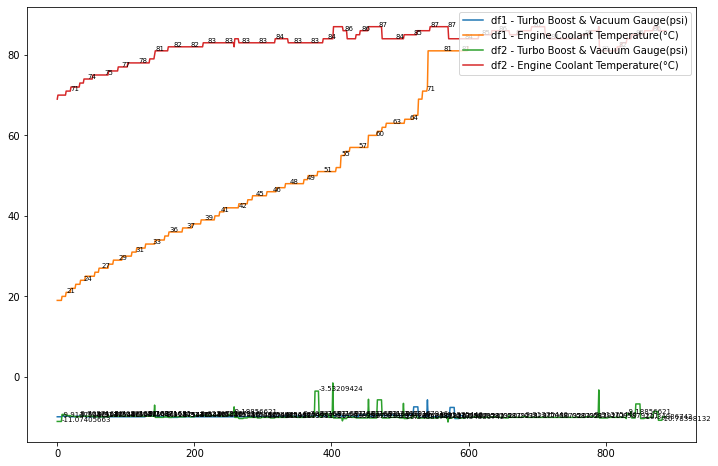

1
       Engine RPM(rpm)  Turbo Boost & Vacuum Gauge(psi)  \
count       600.000000                       600.000000   
mean        794.076250                        -9.761707   
std         159.526445                         0.416498   
min         665.250000                       -10.348867   
25%         720.000000                        -9.913754   
50%         775.750000                        -9.913754   
75%         817.250000                        -9.768717   
max        1973.250000                        -5.707660   

       Engine Coolant Temperature(°C)  
count                      600.000000  
mean                        46.985000  
std                         16.795384  
min                         19.000000  
25%                         34.000000  
50%                         45.000000  
75%                         57.000000  
max                         82.000000  
2
       Engine RPM(rpm)  Turbo Boost & Vacuum Gauge(psi)  \
count       889.000000                       

In [4]:
plotValsShowVals([boost, coolantTemp], getDfsRunStationary([golf2, golf3]))
statGolfs = getDfsRunStationary([golf2, golf3])
printDescribes([rpm, boost, coolantTemp], statGolfs)

## Investigating dynamic values for Golf
have two dfs (golf1 and golf2) looking at in 2 different ways. One is when the engine is not started, the other is when then engine is started but the vehicle is stationary.

* 1 - golf 1 not started
* 2 - golf 2 not started
* 3 - golf 1 started and stationary
* 4 - golf 2 started and stationary

In [5]:
['CO₂ in g/km (Average)(g/km)', # not useful
'Distance travelled with MIL/CEL lit(miles)', # NU
 'Engine Coolant Temperature(°C)', #NU
  'Engine Load(%)', # the median seems to hover around the same value when started and stationary, risky to use though
 'Engine RPM(rpm)', # need to investigate more. Seems to take a very long time for the engine to heat up and for RPMs to settle for the Golf
  'Fuel Trim Bank 1 Long Term(%)', # seems like it had a good stable val before the engine was started of 1.5625
   'Fuel Trim Bank 1 Short Term(%)', #NU
 'Intake Air Temperature(°C)', #NU
 'Intake Manifold Pressure(psi)', # maybe useful when the engine has been started
 'Kilometers Per Litre(Instant)(kpl)', # NU
 'Kilometers Per Litre(Long Term Average)(kpl)', # seems useful, same with the other efficiency ones
 # of course will have to talk about how are profiling the driver here as much as the car
  'Litres Per 100 Kilometer(Long Term Average)(l/100km)', 
 'Miles Per Gallon(Instant)(mpg)', #NU
 'Miles Per Gallon(Long Term Average)(mpg)', 
 'O2 Sensor1 Wide Range Current(mA)', # NU
  'O2 Bank 1 Sensor 1 Wide Range Equivalence Ratio(λ)', #need to look up the meaning , seems to always stay around the same value, more stable before starting
 'O2 Bank 1 Sensor 2 Voltage(V)', # the mine is maybe stable at .46 before starting but maybe best to just avoid
  'Speed (OBD)(mph)', #  NU 
 'Throttle Position(Manifold)(%)', # looks v useful. Looks to be stable at diff values depending on off or running
  'Trip average KPL(kpl)', 'Trip average Litres/100 KM(l/100km)', # better off using the longer term ones
 'Trip average MPG(mpg)', 'Turbo Boost & Vacuum Gauge(psi)'] # spoke about, seems too dependant on the coolant, though less so than with the Accord

['CO₂ in g/km (Average)(g/km)',
 'Distance travelled with MIL/CEL lit(miles)',
 'Engine Coolant Temperature(°C)',
 'Engine Load(%)',
 'Engine RPM(rpm)',
 'Fuel Trim Bank 1 Long Term(%)',
 'Fuel Trim Bank 1 Short Term(%)',
 'Intake Air Temperature(°C)',
 'Intake Manifold Pressure(psi)',
 'Kilometers Per Litre(Instant)(kpl)',
 'Kilometers Per Litre(Long Term Average)(kpl)',
 'Litres Per 100 Kilometer(Long Term Average)(l/100km)',
 'Miles Per Gallon(Instant)(mpg)',
 'Miles Per Gallon(Long Term Average)(mpg)',
 'O2 Sensor1 Wide Range Current(mA)',
 'O2 Bank 1 Sensor 1 Wide Range Equivalence Ratio(λ)',
 'O2 Bank 1 Sensor 2 Voltage(V)',
 'Speed (OBD)(mph)',
 'Throttle Position(Manifold)(%)',
 'Trip average KPL(kpl)',
 'Trip average Litres/100 KM(l/100km)',
 'Trip average MPG(mpg)',
 'Turbo Boost & Vacuum Gauge(psi)']

## Fuel Rail Pressure

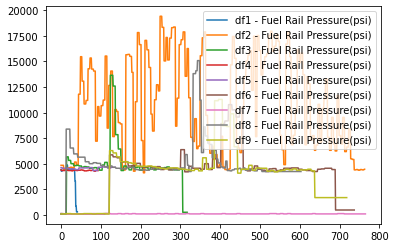

In [6]:
plotValsMultDfsHasValue([fuelRailP], dfList)


Difficult to find a pattern here.
After some investigation, found that the FRP while RPM was at 0 might be consistent looking at this graph

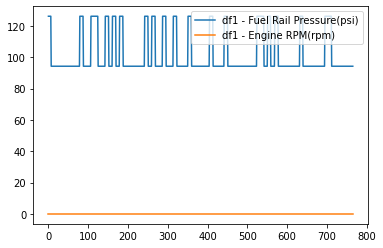

In [7]:
    plotValsMultDfsHasValue([fuelRailP, rpm], [accord7])


1
       Fuel Rail Pressure(psi)  Engine Coolant Temperature(°C)
count                 6.000000                             6.0
mean                981.905482                            34.0
std                1176.680004                             0.0
min                 285.724335                            34.0
25%                 285.724335                            34.0
50%                 572.899063                            34.0
75%                 860.073791                            34.0
max                3314.112305                            34.0
2
       Fuel Rail Pressure(psi)  Engine Coolant Temperature(°C)
count                      0.0                             0.0
mean                       NaN                             NaN
std                        NaN                             NaN
min                        NaN                             NaN
25%                        NaN                             NaN
50%                        NaN                     

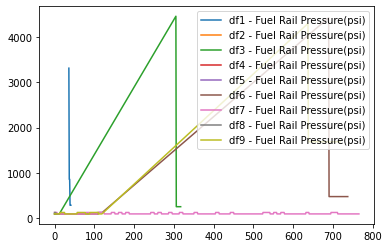

In [8]:
printDescribes([fuelRailP, coolantTemp], dfList0Rpms)
plotValsMultDfsHasValue([fuelRailP], dfList0Rpms)

Coolant temperature seems to be again the factor that throws off this, same as with turbo boost

In [9]:
accord6.corr()

,0100,011c obd standards vehicle conforms to,0120,0903,Distance travelled with MIL/CEL lit(miles),EGR Commanded(%),EGR Error(%),Engine Coolant Temperature(°C),Engine Load(%),Engine RPM(rpm),...,Kilometers Per Litre(Long Term Average)(kpl),Litres Per 100 Kilometer(Long Term Average)(l/100km),Mass Air Flow Rate(g/s),Miles Per Gallon(Instant)(mpg),Miles Per Gallon(Long Term Average)(mpg),pids supported 01-20,service 09 pids supported,Speed (OBD)(mph),Turbo Boost & Vacuum Gauge(psi),Voltage (OBD Adapter)(V)
0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
011c obd standards vehicle conforms to,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance travelled with MIL/CEL lit(miles),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EGR Commanded(%),NaN,NaN,NaN,NaN,NaN,1.000000,NaN,-0.358640,0.378849,0.456743,...,-0.031115,0.031518,0.450320,0.057996,-0.031118,NaN,0.989026,0.092462,-0.330050,0.213850
EGR Error(%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Coolant Temperature(°C),NaN,NaN,NaN,NaN,NaN,-0.358640,NaN,1.000000,0.117970,0.277136,...,0.179495,-0.178879,0.252793,0.134573,0.179494,NaN,-0.362619,0.137391,-0.262828,0.473023
Engine Load(%),NaN,NaN,NaN,NaN,NaN,0.378849,NaN,0.117970,1.000000,0.781643,...,-0.531818,0.532595,0.779300,-0.039543,-0.531822,NaN,0.376010,0.358352,-0.412139,0.695596
Engine RPM(rpm),NaN,NaN,NaN,NaN,NaN,0.456743,NaN,0.277136,0.781643,1.000000,...,-0.234560,0.235259,0.995355,0.176277,-0.234563,NaN,0.461811,0.415796,-0.617008,0.869427


There are possible correlations here, between coolant temperature and each of Turbo Boost, Fuel Rail Pressure and Mass Air Flow rate

## Volumetric Efficiency


In [10]:
printDescribes(volEff, convertDfsColsToNums(dfList, volEff))

1
count    38.000000
mean     78.210526
std       4.668224
min      59.000000
25%      79.000000
50%      79.000000
75%      80.000000
max      81.000000
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
2
count    758.000000
mean      64.935356
std       18.090694
min       32.000000
25%       49.000000
50%       63.000000
75%       82.000000
max      100.000000
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
3
count    299.000000
mean      68.123746
std       13.854036
min       43.000000
25%       56.500000
50%       75.000000
75%       80.000000
max       84.000000
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
4
count    93.000000
mean     76.903226
std       0.723285
min      76.000000
25%      76.000000
50%      77.000000
75%      77.000000
max      78.000000
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
5
count    137.000000
mean      78.138686
std        0.608548
min       77.000000
25%       78.000000
50%       78.000000
75%   

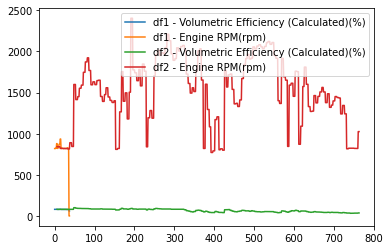

In [11]:
plotValsMultDfsHasValue([volEff, rpm], convertDfsColsToNums([accord1, accord2], volEff))

In [12]:
printDescribes(volEff, convertDfsColsToNums(dfList0Rpms, volEff))


1
count     2.0
mean     59.0
std       0.0
min      59.0
25%      59.0
50%      59.0
75%      59.0
max      59.0
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
2
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
3
count    13.0
mean     58.0
std       0.0
min      58.0
25%      58.0
50%      58.0
75%      58.0
max      58.0
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
4
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
5
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Volumetric Efficiency (Calculated)(%), dtype: float64
6
count    49.0
mean     59.0
std       0.0
min      59.0
25%      59.0
50%      59.0
75%      59.0
max      59.0
Name: Volumetric Efficiency (Calculated)

Very finicky but could use. When RPM is 0 then value is 58 or 59, but was wrongly 0 once, so need to add that additional check. Often gives nan though, so am deciding not to use

## Summary
That is all the useful dynamic responses form the 08 Accord

* RPM
    * take once engine has heated up, past 25 or 30 degrees
    * Take median after that assuming the engine is left idling
    * The min dips occasionally so that cannot be taken, hence take the median instead
    * Varies slightly from 819 to 821
* EGR Percent
    * Take while engine has not started, so RPM is at 0
    * Looks to be a constant then
    * take median or bottom quartile seems good when engine has been started, but can just filter out where rpm is not 0
* Volumetric Efficiency
    * Value was not captured sometimes
    * When engine not started (RPM at 0) then seems stable, at 58 or 59
    * Check to make sure the RPM is not "-" and is at 0
    * in practice sometimes does not collect anything so is not reliable and decided not to use